# FaceWord Notebook 
### *- Laurits Lyngbæk*
This is a notebook for working through the EEG data from the face-word experiment

In [2]:
# Installing packages in the notebook
%pip install mne


  Using cached mne-1.3.1-py3-none-any.whl (7.6 MB)
  Using cached pooch-1.7.0-py3-none-any.whl (60 kB)
  Attempting uninstall: pooch
    Found existing installation: pooch 1.4.0
    Uninstalling pooch-1.4.0:
      Successfully uninstalled pooch-1.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Loading packages:
import mne
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline

# Fixing data:
There is a problem with the timestamps, we export a csv file to fix the problems in R (im more adept in R)

In [4]:
# Reading files with a hard coded data location
raw = mne.io.read_raw_brainvision("./Data/own_group8.vhdr", eog= ("EOG1", "EOG2"))
raw.load_data()

Extracting parameters from ./Data/own_group8.vhdr...
Setting channel info structure...
Reading 0 ... 652999  =      0.000 ...   652.999 secs...


<RawBrainVision | own_group8.eeg, 32 x 653000 (653.0 s), ~159.5 MB, data loaded>

In [49]:
# Save the timestamps as a csv file for manipulation in R
timestamps = mne.events_from_annotations(raw)[0]
np.savetxt("Fixing_Timestamps/timestamps.csv", timestamps, delimiter=",")
# Import the manipulated timestamps from R
# Read the CSV file into a pandas DataFrame
cleaned_events_df = pd.read_csv('Fixing_Timestamps/Cleaned_Timestamps.csv')

# Convert the DataFrame to a numpy array
cleaned_events = cleaned_events_df.to_numpy()


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S114', 'Stimulus/S115', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S214', 'Stimulus/S215', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223']


In [32]:

# Save the manipulated timestamps to mne.events_from_annotations(raw)[0]



KeyError: 'annotations'

Using matplotlib as 2D backend.


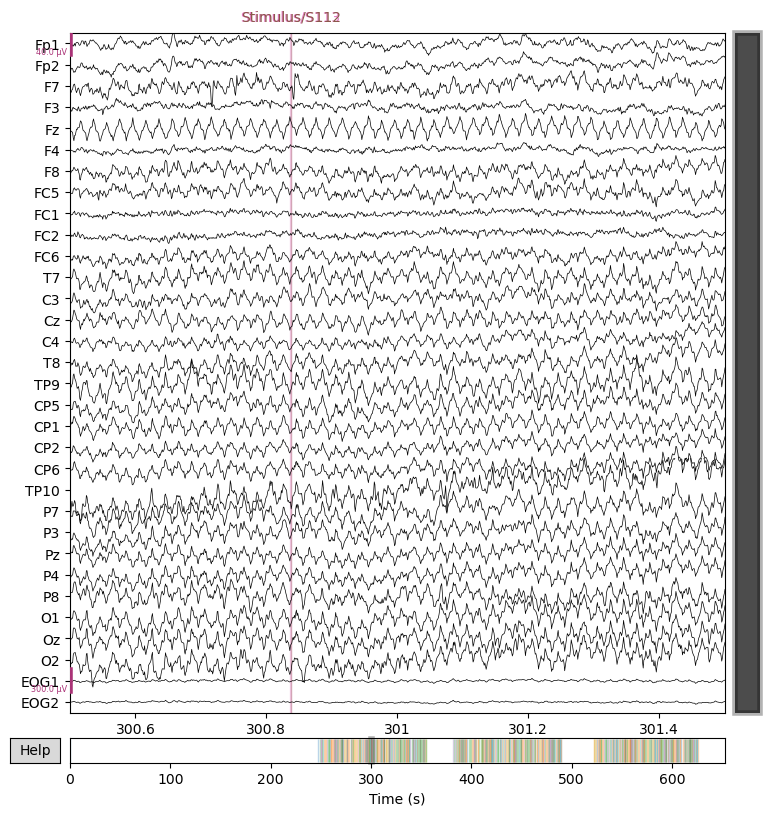

In [36]:

# Selecting only EEG and stimulus data & plotting raw data
raw.plot(n_channels=32, duration=1, start = 300.5);

In [38]:

#Specify the channel locations using standard_montage

montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)




<RawBrainVision | own_group8.eeg, 32 x 653000 (653.0 s), ~159.5 MB, data loaded>

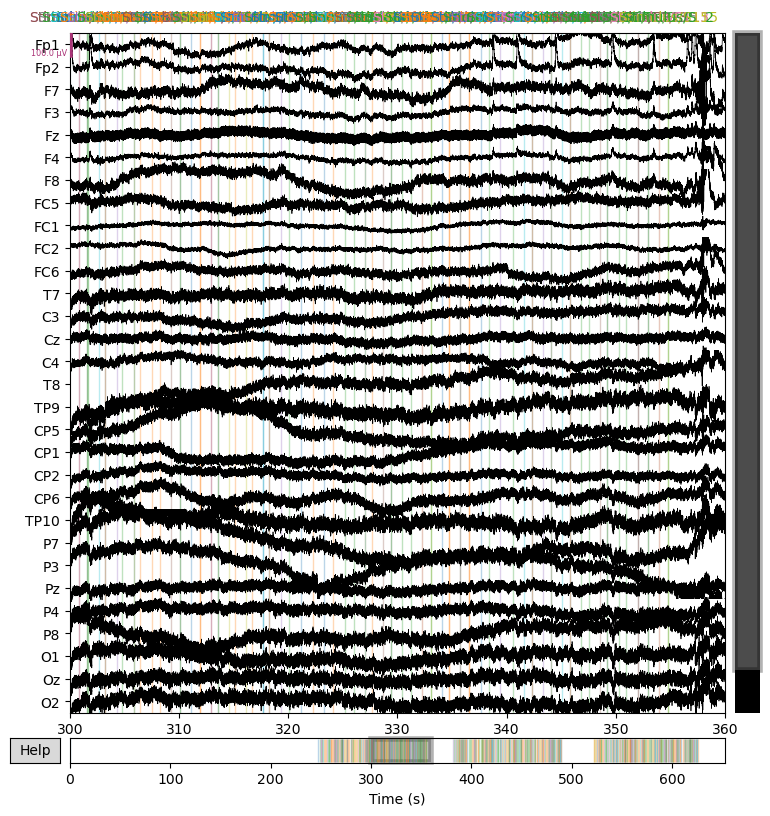

Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished


In [39]:
# Try to find bad channels using ICA:
raw.plot(n_channels=30, duration=60, start = 300, scalings=dict(eeg=50e-6));
#ICA
import sklearn # scikit-learn is needed to run ICA (Independent Component Analysis)
raw.set_eeg_reference(ref_channels='average', ch_type='eeg')
raw_fit = raw.copy().filter(1, None)



Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by explained variance: 15 components
Fitting ICA took 15.6s.


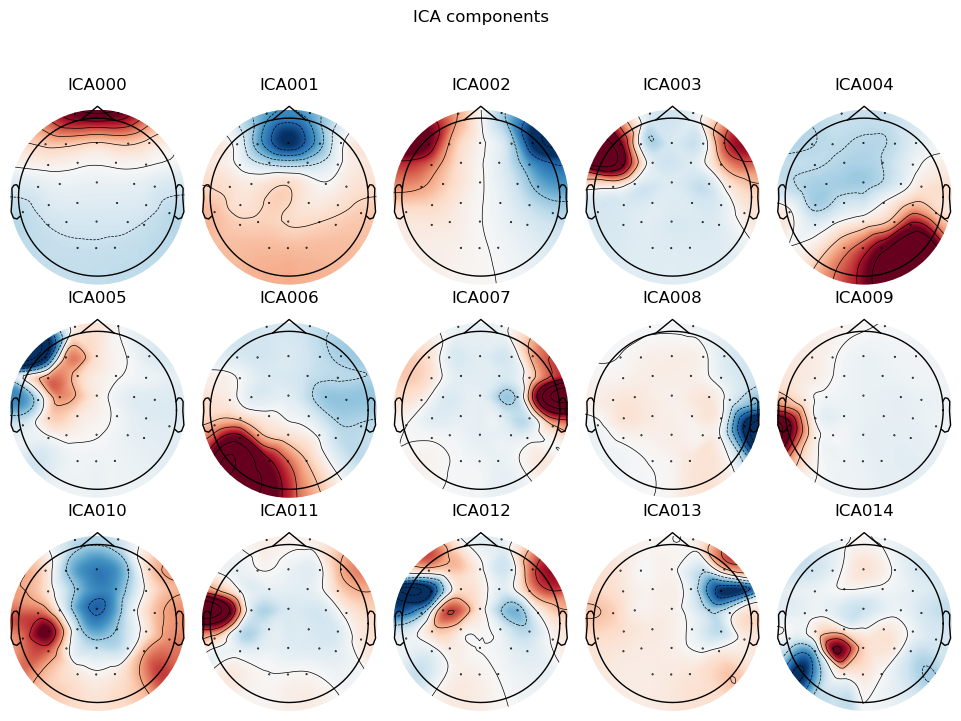

In [40]:
ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter=800)
ica.fit(raw_fit)
ica.plot_components();

Creating RawArray with float64 data, n_channels=17, n_times=653000
    Range : 0 ... 652999 =      0.000 ...   652.999 secs
Ready.


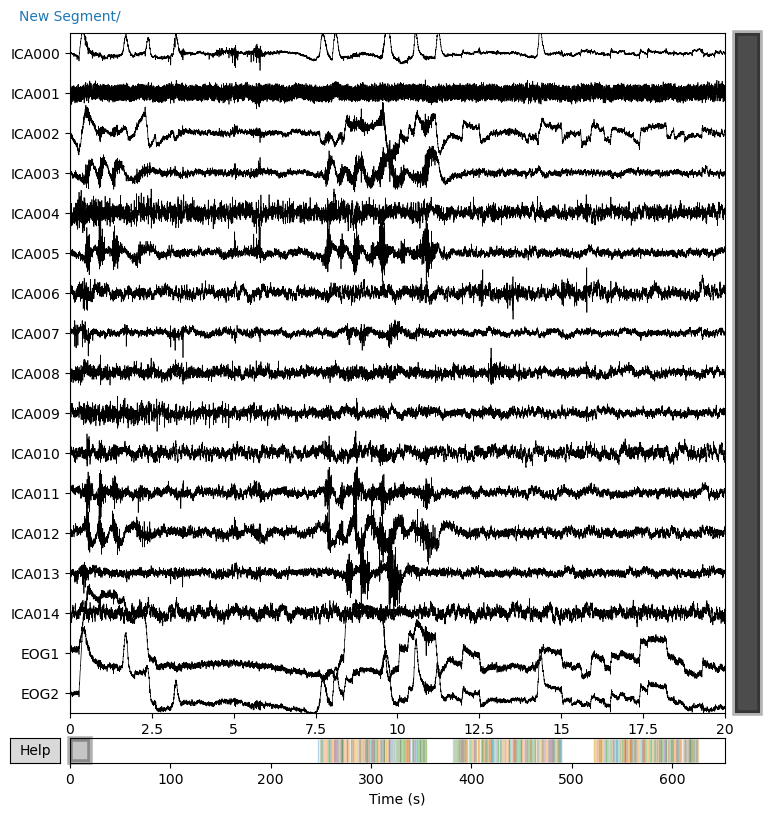

In [41]:
ica.plot_sources(raw_fit);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
326 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
326 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
326 matching events found
No baseline correction applied
0 projection items activated


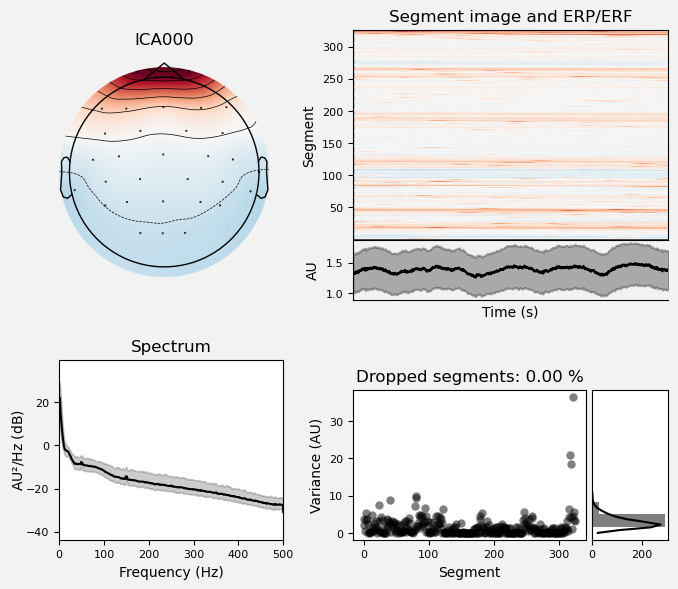

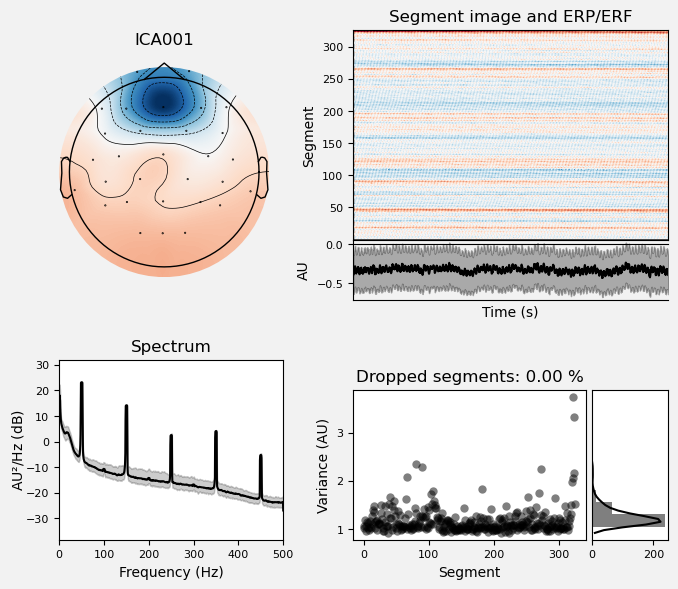

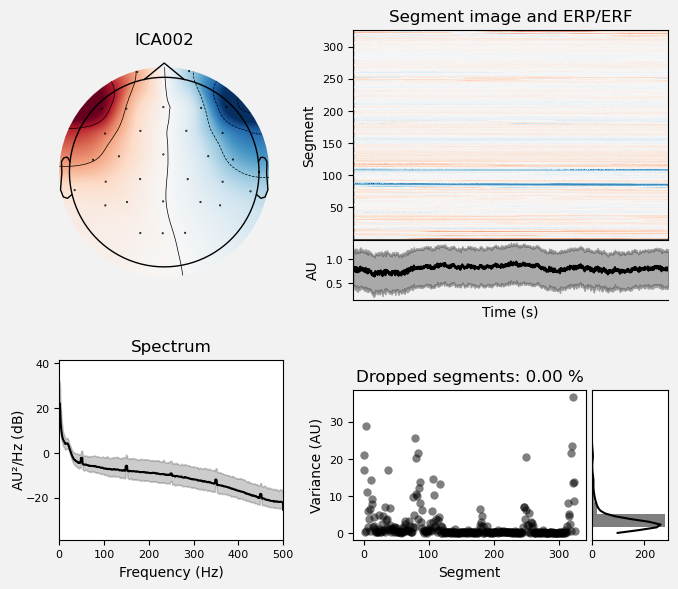

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components


<RawBrainVision | own_group8.eeg, 32 x 653000 (653.0 s), ~159.5 MB, data loaded>

In [42]:
ica.exclude = [0,1,2] # setting the exclude argument to the noise components
ica.plot_properties(raw, picks=ica.exclude); # plotting the components that will be excluded (sanity check, did we index the right ones?)

ica.apply(raw)

In [ ]:
#No obvious bad channels found

#lowpass filter
raw.filter(None, 40)
#Highpass filter
raw.filter(0.1, None)

In [ ]:
# it seems the intense amplitude and frequenzy of the Fz makes the data un-interprable
#raw.info['bads'] = ['Fz']
#raw.pick_types(meg=False, eeg=True, stim=True, exclude='bads')


#### COMMENTED OUT as this was not necessarry/warranted after ICA

In [ ]:
#Plotting after filtering:

raw.plot(n_channels=30, duration=20, start=300, scalings=dict(eeg=50e-6));

In [28]:
event_id = {
    'Changed/Familliar/0' : 221,
    'Changed/Familliar/90' : 222,
    'Changed/Familliar/180' : 223,
    'Changed/Unfamilliar/0' : 211,
    'Changed/Unfamilliar/90' : 212,
    'Changed/Unfamilliar/180' : 213,
    'Unchanged/Familliar/0' : 121,
    'Unchanged/Familliar/90' : 122,
    'Unchanged/Familliar/180' : 123,
    'Unchanged/Unfamilliar/0' : 111,
    'Unchanged/Unfamilliar/90' : 112,
    'Unchanged/Unfamilliar/180' : 113,
    'Response_Changed' : 1,
    'Response_Unchanged' : 2,

}

C:\Users\lauri\AppData\Local\Temp\ipykernel_12004\4088195494.py:3: RuntimeWarning: event nan missing from event_id will be ignored
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);
C:\Users\lauri\AppData\Local\Temp\ipykernel_12004\4088195494.py:3: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);


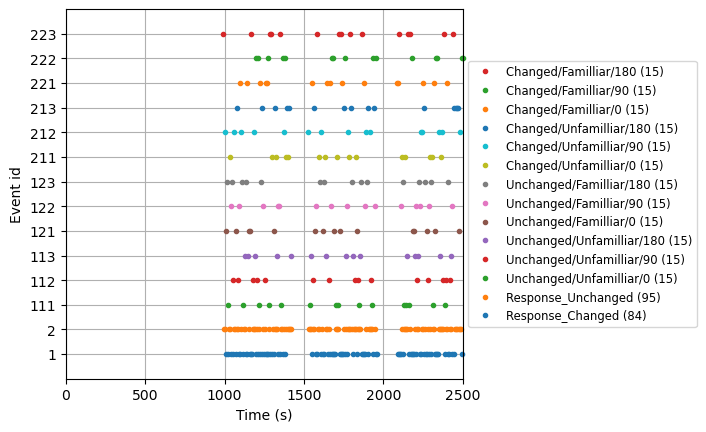

In [35]:
# Plot events :))
events = cleaned_events
mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);

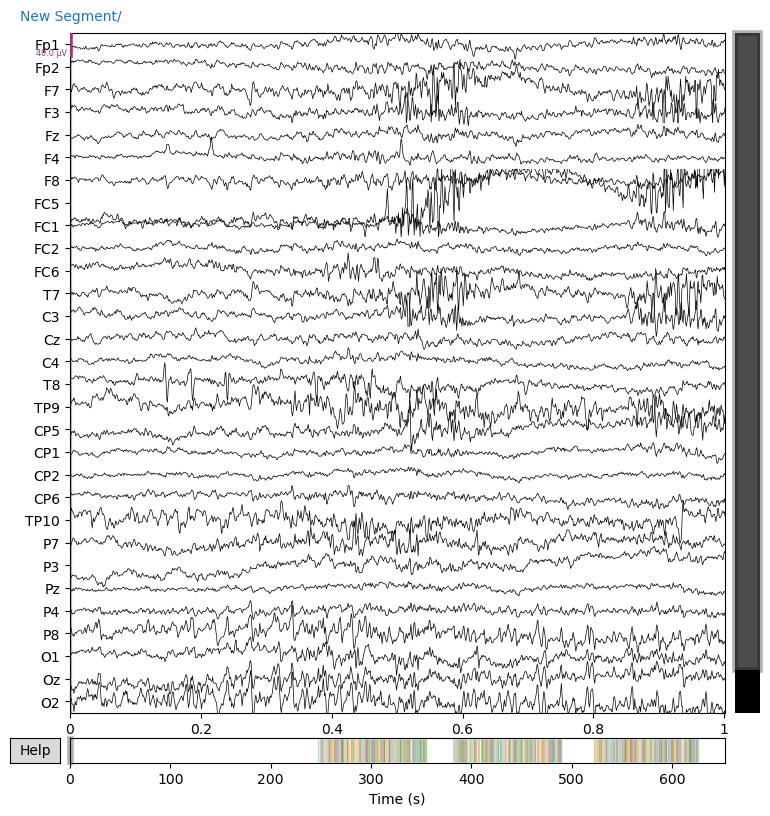

TypeError: events should be a NumPy array of integers, got <class 'numpy.ndarray'>

In [43]:
# Define time window for epochs:
tmin, tmax = -0.1, 0.7
#create the rejection dictionary (how big the difference between a low and high can be in a (unrejected) epoch
reject = {'eeg': 150e-6} 
raw.plot(n_channels=30, duration=1, scalings=dict(eeg=20e-6));
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, reject=reject, preload=True)




In [48]:
# Downsample the data:
epochs_resampled = epochs.resample(250)

NameError: name 'epochs' is not defined

# ERP analysis
The data has been preprocessed and is ready to be analyzed-

In [44]:
# Group the epochs by modality (i.e. visual and auditory)
word_pos = epochs_resampled['wPos']
word_neg = epochs_resampled['wNeg']
word_neu =  epochs_resampled['wNeu']
print(word_pos)


# and create evoked responses (averaged across trials)
evoked_word_pos = word_pos.average()
evoked_word_neg = word_neg.average()
evoked_word_neu = word_neu.average()
print(epoch_word_pos)

word_pos.plot_sensors(ch_type='eeg', show_names=True);

NameError: name 'epochs_resampled' is not defined

In [45]:
mne.viz.plot_compare_evokeds(dict(positive=epoch_word_pos, negative=epoch_word_neg),
                             legend='upper left', show_sensors='upper right')

NameError: name 'epoch_word_pos' is not defined

In [46]:
pos_word_plot = word_pos.plot_image(picks='O1');
pos_word_plot = word_neg.plot_image(picks='O1');

NameError: name 'word_pos' is not defined

In [47]:
pos_word_plot[0]

NameError: name 'pos_word_plot' is not defined